In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['googleplaystore.csv']


In [2]:
df = pd.read_csv("../input/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
features = ['Category','Rating','Reviews','Size','Type','Price','Content Rating']
y = ['Installs']

dropping a row with app name 'Life Made WI-Fi Touchscreen Photo Frame' as it has shifted data:

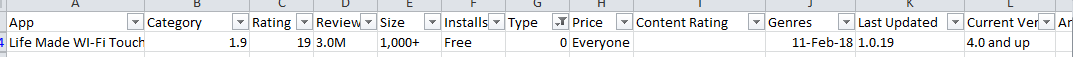

In [4]:
print(df.columns)
df = df.set_index("App")
print(df.columns)
df = df.drop("Life Made WI-Fi Touchscreen Photo Frame")
df = df.reset_index()
print(df.columns)
#df[df['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


Now, we impute the median rating for all the NaN values in the column Rating
1.Remove NANs from type and other features.
2.write a function and change the value of type (free=0 and paid = 1)
3.plot individual graphs

In [5]:
df['Rating'].fillna(df.median()['Rating'],inplace=True)

Function for converting size into a uniform unit(M).
Varies with device => -1

In [6]:
#print(df['Size'])

def size_convert(d):
    s=d[4]
    if s[len(s)-1] == "M":
        return float(s[:len(s)-1])
    elif s[len(s)-1] == "k" or s[len(s)-1] == "K":
        return (float(s[0:len(s)-1])/1000)
    else:
        return -1

In [7]:
df['Size'] = df.apply(size_convert, axis=1)

In [8]:
def clean_Installs(b):
    a=b[5]
    return(a.replace("+","").replace(",",""))
df['Installs'] = df.apply(clean_Installs, axis=1)

In [9]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [10]:
def clean_Price(b):
    a=b[7]
    return(a.replace("$",""))
df['Price'] = df.apply(clean_Price, axis=1)

In [11]:
df.Reviews = df.Reviews.apply(int)
df.Installs = df.Installs.apply(int)
df.Price = df.Price.apply(float)

Making the single record with Type as NaN 'Free'

In [12]:
fil1 = df.Type.isnull()
fil2 = df.Price == 0
df['Type'].fillna("Free",inplace=True)

Making dummies for the types: Free and Paid

In [13]:
#dummy = pd.get_dummies(df['Type'])
#df = pd.concat([df,dummy],axis = 1)
#df.head()

In [14]:
 def make_others(d):
        a = d[1]
        k=df.Category.unique()
        k=k.tolist()
        k.remove('SPORTS')
        k.remove('COMMUNICATION')
        k.remove('ENTERTAINMENT')
        k.remove('HEALTH_AND_FITNESS')
        k.remove('GAME')
        k.remove('FAMILY')
        k.remove('SOCIAL')
        k.remove('PHOTOGRAPHY')
        k.remove('TRAVEL_AND_LOCAL')
        k.remove('TOOLS')
        k.remove('PRODUCTIVITY')
        k.remove('VIDEO_PLAYERS')
        k.remove('NEWS_AND_MAGAZINES')
        k.remove('LIFESTYLE')
        k.remove('PERSONALIZATION')
        k.remove('LIBRARIES_AND_DEMO')
        k.remove('SHOPPING')
        if a in k:
            return "OTHERS"
        else:
            return a

In [15]:
df['Category'] = df.apply(make_others, axis=1)

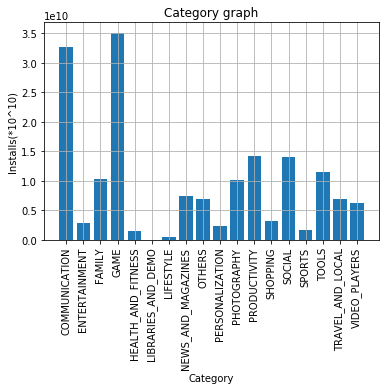

In [16]:
df_cat = df.groupby(df['Category']).agg({'Installs':np.sum}).reset_index()
plt.bar(df_cat.Category,df_cat.Installs)
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Installs(*10^10)')
plt.title('Category graph')
plt.show()

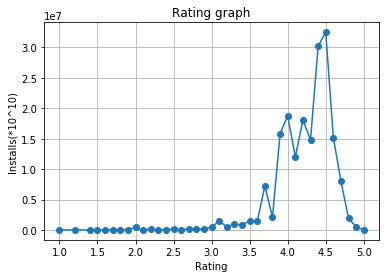

In [17]:
df_rat = df.groupby(df['Rating']).agg({'Installs':np.average}).reset_index()
plt.plot(df_rat.Rating,df_rat.Installs,marker='o')
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Installs(*10^10)')
plt.title('Rating graph')
plt.show()

In [18]:
print(df.Reviews.max(),df.Reviews.min())
import numpy as np

custom_bucket_array = np.arange(0,78158306,10000000)
df["Reviews"] = pd.cut(df["Reviews"],custom_bucket_array)

fin1 = df.groupby(df.Reviews).agg({'Installs':np.average}).reset_index()
#print(fin1)
categories = fin1['Reviews'].cat.categories
ind = np.array([x for x, _ in enumerate(categories)])
width = 0.15 

78158306 0


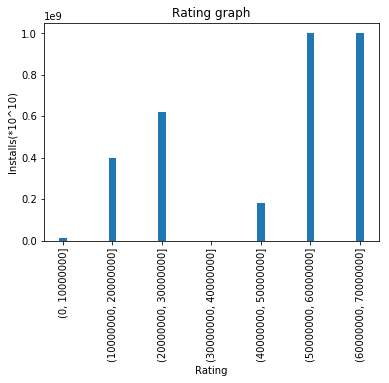

In [19]:
plt.bar(ind,fin1["Installs"],width, label='Installs')
plt.xticks(ind, categories)
plt.xticks(rotation = 90)
plt.xlabel('Rating')
plt.ylabel('Installs(*10^10)')
plt.title('Rating graph')
plt.show()

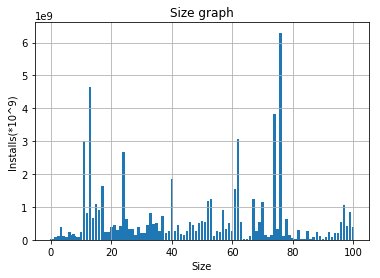

In [20]:
from scipy import stats
df_1 = df[df['Size'] != -1]
df_size = df_1.groupby(df_1['Size']).agg({'Installs':np.sum}).reset_index()
plt.bar(df_size.Size,df_size.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Size')
plt.ylabel('Installs(*10^9)')
plt.title('Size graph')
plt.show()

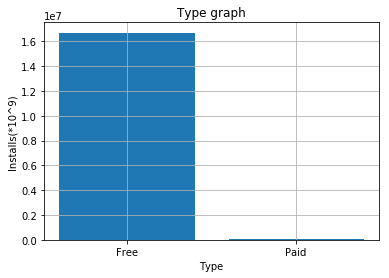

In [21]:
df_type = df.groupby(df['Type']).agg({'Installs':np.average}).reset_index()
plt.bar(df_type.Type,df_type.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Installs(*10^9)')
plt.title('Type graph')
plt.show()

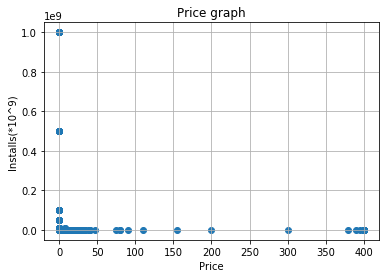

In [22]:
plt.scatter(df.Price,df.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Installs(*10^9)')
plt.title('Price graph')
plt.show()

In [23]:
df = df[df['Price']<290]

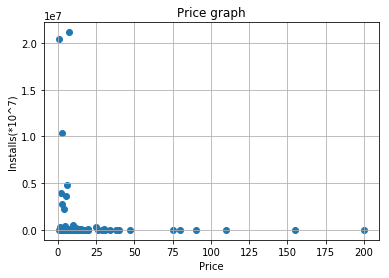

In [24]:
df_2 = df[df['Price']!=0]
df_type = df_2.groupby(df_2['Price']).agg({'Installs':np.sum}).reset_index()
plt.scatter(df_type.Price,df_type.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Price')
plt.ylabel('Installs(*10^7)')
plt.title('Price graph')
plt.show()

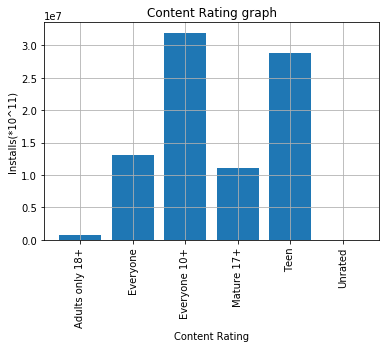

In [25]:
df_cnt = df.groupby(df['Content Rating']).agg({'Installs':np.average}).reset_index()
plt.bar(df_cnt['Content Rating'],df_cnt.Installs)
plt.grid()
#plt.xticks(rotation=90)
plt.xlabel('Content Rating')
plt.ylabel('Installs(*10^11)')
plt.xticks(rotation=90)
plt.title('Content Rating graph')
plt.show()